In [18]:
import numpy as np
from PIL import Image

In [19]:
img = Image.open('data/cats/cat.1.jpg')
M = np.asarray(img)

In [20]:
def histograms(M):
    total_pixels = M.shape[0] * M.shape[1]

    red_hist = [0] * 256
    green_hist = [0] * 256
    blue_hist = [0] * 256

    for i in range(3):
        for j in M[:, :, i]:
            for k in j:
                if i == 0:
                    red_hist[k] += 1
                elif i == 1:
                    green_hist[k] += 1
                else:
                    blue_hist[k] += 1
    red_prob_hist = [count / total_pixels for count in red_hist]
    green_prob_hist = [count / total_pixels for count in green_hist]
    blue_prob_hist = [count / total_pixels for count in blue_hist]

    return red_prob_hist, green_prob_hist, blue_prob_hist

red_histogram, green_histogram, blue_histogram = histograms(M)
print(red_histogram, green_histogram, blue_histogram, sep='\n')

[0.0, 1.1904761904761905e-05, 1.1904761904761905e-05, 2.380952380952381e-05, 4.761904761904762e-05, 1.1904761904761905e-05, 2.380952380952381e-05, 3.571428571428572e-05, 3.571428571428572e-05, 8.333333333333333e-05, 0.0005, 0.0008214285714285715, 0.0012976190476190477, 0.002773809523809524, 0.0029404761904761904, 0.003857142857142857, 0.0044523809523809525, 0.005702380952380953, 0.005976190476190476, 0.006380952380952381, 0.0069642857142857145, 0.007964285714285714, 0.008273809523809524, 0.008238095238095239, 0.007916666666666667, 0.007952380952380952, 0.0074523809523809525, 0.006928571428571429, 0.007666666666666666, 0.007154761904761905, 0.006595238095238095, 0.007226190476190476, 0.007511904761904762, 0.0069642857142857145, 0.007226190476190476, 0.007309523809523809, 0.007619047619047619, 0.008654761904761905, 0.009297619047619048, 0.010047619047619048, 0.010511904761904762, 0.010130952380952381, 0.011095238095238096, 0.010142857142857143, 0.010226190476190476, 0.009821428571428571,

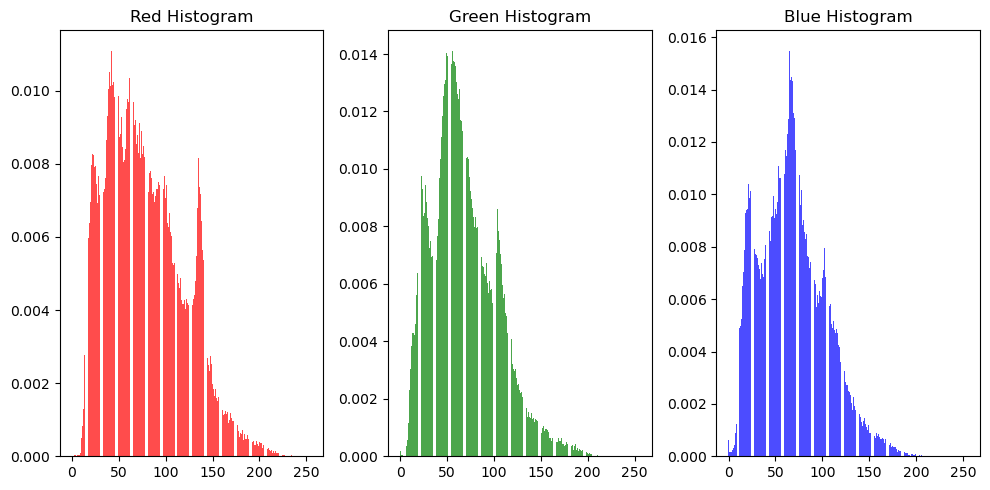

In [21]:
import matplotlib.pyplot as plt
intensity_levels = range(256)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(intensity_levels, red_histogram, color='red', alpha=0.7)
plt.title('Red Histogram')

plt.subplot(1, 3, 2)
plt.bar(intensity_levels, green_histogram, color='green', alpha=0.7)
plt.title('Green Histogram')

plt.subplot(1, 3, 3)
plt.bar(intensity_levels, blue_histogram, color='blue', alpha=0.7)
plt.title('Blue Histogram')

plt.tight_layout()
plt.show()

In [22]:
import numpy as np
from scipy.stats import skew, kurtosis

def featurize(hist):
    vec = []
    sum = 0
    for i in range(len(hist)):
        sum += hist[i]
        while int(sum*10) > len(vec):
            vec.append(i)

    if len(vec) == 9:
        vec.append(255)
    
    mn = np.mean(vec)
    var = np.var(vec)
    skw = skew(vec)
    kurt = kurtosis(vec)
    feature_vec = [mn, var, skw, kurt]
    return feature_vec

# print(featurize(blue_histogram))

In [23]:
import os

def get_image_filenames(folder_path):
    files = os.listdir(folder_path)
    image_files = [file for file in files if file.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
    return image_files


cats_filenames = get_image_filenames('data/cats/')
dogs_filenames = get_image_filenames('data/dogs/')
horses_filenames = get_image_filenames('data/horses/')
humans_filenames = get_image_filenames('data/human/')

In [24]:
print(cats_filenames, dogs_filenames, horses_filenames, humans_filenames, sep = '\n')

['cat.1.jpg', 'cat.138.jpg', 'cat.104.jpg', 'cat.110.jpg', 'cat.111.jpg', 'cat.105.jpg', 'cat.139.jpg', 'cat.113.jpg', 'cat.107.jpg', 'cat.106.jpg', 'cat.112.jpg', 'cat.116.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.117.jpg', 'cat.101.jpg', 'cat.115.jpg', 'cat.129.jpg', 'cat.128.jpg', 'cat.114.jpg', 'cat.100.jpg', 'cat.119.jpg', 'cat.125.jpg', 'cat.131.jpg', 'cat.130.jpg', 'cat.124.jpg', 'cat.118.jpg', 'cat.132.jpg', 'cat.126.jpg', 'cat.127.jpg', 'cat.133.jpg', 'cat.137.jpg', 'cat.123.jpg', 'cat.122.jpg', 'cat.136.jpg', 'cat.120.jpg', 'cat.134.jpg', 'cat.108.jpg', 'cat.109.jpg', 'cat.135.jpg', 'cat.121.jpg', 'cat.11.jpg', 'cat.10.jpg', 'cat.12.jpg', 'cat.13.jpg', 'cat.140.jpg', 'cat.141.jpg', 'cat.143.jpg', 'cat.14.jpg', 'cat.142.jpg']
['dog.104.jpg', 'dog.110.jpg', 'dog.138.jpg', 'dog.1.jpg', 'dog.139.jpg', 'dog.111.jpg', 'dog.105.jpg', 'dog.113.jpg', 'dog.107.jpg', 'dog.106.jpg', 'dog.112.jpg', 'dog.116.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.117.jpg', 'dog.129.jpg', 'dog.101.jpg', 'd

In [25]:
import csv

csv_file_path = "features.csv"

# Write feature vectors to CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header
    writer.writerow(["Red_Mean", "Red_Variance", "Red_Skewness", "Red_Kurtosis",
                     "Green_Mean", "Green_Variance", "Green_Skewness", "Green_Kurtosis",
                     "Blue_Mean", "Blue_Variance", "Blue_Skewness", "Blue_Kurtosis",
                     "Category"])

In [26]:
import csv

# CSV file path
csv_file_path = "features.csv"

# Open CSV file for writing
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header
    writer.writerow(["Red_Mean", "Red_Variance", "Red_Skewness", "Red_Kurtosis",
                     "Green_Mean", "Green_Variance", "Green_Skewness", "Green_Kurtosis",
                     "Blue_Mean", "Blue_Variance", "Blue_Skewness", "Blue_Kurtosis",
                     "Category"])

    # Loop through each cat image
    for img in cats_filenames:
        file_name = 'data/cats/' + img
        image = Image.open(file_name)
        M = np.asarray(image)
        red_histogram, green_histogram, blue_histogram = histograms(M)
        red_features = featurize(red_histogram)
        green_features = featurize(green_histogram)
        blue_features = featurize(blue_histogram)
        
        # Combine the features into a single row
        row = red_features + green_features + blue_features + ["cats"]
        
        # Write the row to the CSV file
        writer.writerow(row)
    
    for img in dogs_filenames:
        file_name = 'data/dogs/' + img
        image = Image.open(file_name)
        M = np.asarray(image)
        red_histogram, green_histogram, blue_histogram = histograms(M)
        red_features = featurize(red_histogram)
        green_features = featurize(green_histogram)
        blue_features = featurize(blue_histogram)
        
        # Combine the features into a single row
        row = red_features + green_features + blue_features + ["dogs"]
        
        # Write the row to the CSV file
        writer.writerow(row)

    for img in horses_filenames:
        file_name = 'data/horses/' + img
        image = Image.open(file_name)
        M = np.asarray(image)
        red_histogram, green_histogram, blue_histogram = histograms(M)
        red_features = featurize(red_histogram)
        green_features = featurize(green_histogram)
        blue_features = featurize(blue_histogram)
        
        # Combine the features into a single row
        row = red_features + green_features + blue_features + ["horses"]
        
        # Write the row to the CSV file
        writer.writerow(row)

    for img in humans_filenames:
        file_name = 'data/human/' + img
        image = Image.open(file_name)
        M = np.asarray(image)
        red_histogram, green_histogram, blue_histogram = histograms(M)
        red_features = featurize(red_histogram)
        green_features = featurize(green_histogram)
        blue_features = featurize(blue_histogram)
        
        # Combine the features into a single row
        row = red_features + green_features + blue_features + ["humans"]
        
        # Write the row to the CSV file
        writer.writerow(row)

print("Feature vectors written to", csv_file_path)

Feature vectors written to features.csv
